In [72]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
%autoreload 2

import pandas as pd 
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [74]:
DATASET = os.path.join('2021-SxS-Data-and-Data-Info', 'NFCS_2021_State_Data.csv') 

df = pd.read_csv(DATASET)
COLUMN_MAP = {
    'A2': 'ZIP_CODE',
    'STATEQ': 'STATE',
    'A50': 'GENDER',  # 1 MAN, 2 WOMAN, 3 OTHER   #---- Covariate
    'A50A': 'BINARIZED GENDER',  # 1 MAN, 2 WOMAN  
    'A3Ar_w': 'AGE',  # AGE IN YEARS (13-101, 999 FOR PREFER NOT TO SAY)   #---- Covariate 
    'A50B': 'GENDER/AGE NET',  # GENDER AND AGE COMBINATION 
    'A4': 'RACE_ETHNICITY',  # 1 WHITE, 2 BLACK, 3 HISPANIC, 4 ASIAN, 5 NATIVE HAWAIIAN/OTHER PACIFIC ISLANDER, 6 OTHER, 99 PREFER NOT TO SAY 
    'A4A': 'ETHNICITY_QUOTA',  # 1 WHITE NON-HISPANIC, 2 BLACK NON-HISPANIC, 3 HISPANIC (ALONE OR IN COMBINATION), 4 ASIAN/PACIFIC ISLANDER NON-HISPANIC, 5 OTHER NON-HISPANIC (AMERICAN INDIAN, OTHER, 2+ ETHNICITIES)
    'A51': 'IDENTIFY_HERITAGE_BLACK',  # Column for Q.A51
    'A52': 'IDENTIFY_HERITAGE_HISPANIC',  # Column for Q.A52
    'A53': 'IDENTIFY_HERITAGE_ASIAN_PACIFIC_ISLANDER',  # Column for Q.A53
    'A5': 'EDUCATION_LEVEL',  # Column for Q.A5
    'A6': 'MARITAL_STATUS',  # Column for Q.A6
    'A7': 'LIVING_ARRANGEMENTS',  # Column for Q.A7
    'A7A': 'MARITAL_STATUS_VARIABLE',  # Column for Q.A7a
    'A7AA': 'SPOUSE_OR_PARTNER',  # Column for Q.A7aa
    'A11': 'NUM_DEPENDENT_CHILDREN',  # Column for Q.A11
    'A8': 'APPROX_ANNUAL_INCOME',  # Column for Q.A8
    'AM21': 'ARMED_SERVICES_MEMBERSHIP',  # Column for Q.AM21
    'X3': 'QUESTIONNAIRE_VERSION',  # Column for Q.X3 core [1], military [2]
    'A9': 'EMPLOYMENT_STATUS',  # Column for Q.A9
    'A40': 'OTHER_WORK_IN_PAST_12_MONTHS',  # Column for Q.A40
    'A10': 'SPOUSE_EMPLOYMENT_STATUS',  # Column for Q.A10
    'A10A': 'HOUSEHOLD_RETIREMENT_STATUS',  # Column for Q.A10a
    'A21_2015': 'PART_TIME_STUDENT',  # Column for Q.A21 who in household is more knowledgeable
    'A14': 'KNOWLEDGE_ABOUT_FINANCE',  # Column for Q.A14
    'A41': 'HIGHEST_EDUCATION_OF_RAISERS',  # Column for Q.A41
    'JA': 'FINANCIAL_ATTITUDES_BEHAVIORS',  # Column for SECTION JA
    'J1': 'SATISFACTION_WITH_FINANCIAL_CONDITION',  # Column for Q.J1
    'J2': 'WILLINGNESS_TO_TAKE_RISKS',  # Column for Q.J2
    'J3': 'SPENDING_COMPARISON_TO_INCOME',  # Column for Q.J3
    'J4': 'DIFFICULTY_COVERING_EXPENSES',  # Column for Q.J4
    'J40': 'INCOME_VARIABILITY',  # Column for Q.J40
    'J5': 'EMERGENCY_FUNDS',  # Column for Q.J5
    'J6': 'SAVING_FOR_CHILDRENS_EDUCATION',  # Column for Q.J6
    'J8': 'FIGURING_OUT_RETIREMENT_SAVING',  # Column for Q.J8
    'J9': 'FIGURING_OUT_RETIREMENT_BEFORE_RETIREMENT',  # Column for Q.J9
    'J10': 'EXPERIENCED_LARGE_INCOME_DROP',  # Column for Q.J10
    'J20': 'CONFIDENCE_IN_COMING_UP_WITH_2000',  # Column for Q.J20
    'J50': 'RECEIVED_STIMULUS_PAYMENT',  # Column for Q.J50
    'J51': 'USE_OF_STIMULUS_PAYMENT',  # Column for Q.J51
    'J52': 'LAYOFF_PANDEMIC',  # Column for Q.J52
    'J32': 'CREDIT_RECORD_RATING',  # Column for Q.J32
    'J33_40': 'FIN_ANXIETY',  # Column for Q.J33
    'J53': 'FREQUENCY_OF_THINKING_ABOUT_FINANCES',  # Column for Q.J53
    'J41': 'MONEY_SITUATION_DESCRIPTION',  # Column for Q.J41
    'J42': 'STATEMENTS_APPLICATION_FREQUENCY',  # Column for Q.J42
    'J43': 'FIN_CONFIDENCE',  # Column for Q.J43
    'B1': 'CHECKING_ACCOUNT',  # Column for Q.B1
    'B2': 'SAVINGS_ACCOUNT',  # Column for Q.B2
    'B4': 'OVERDRAW_CHECKING_ACCOUNT',  # Column for Q.B4
    'B14': 'OTHER_INVESTMENTS',
    'B41_1': 'ONLINE_BANKING',  # Column for Q.B41_1
    'B41_2': 'MOBILE_BANKING',  # Column for Q.B41_2
    'B31': 'MOBILE_PAYMENT_IN_PERSON',  # Column for Q.B31
    'B42': 'MOBILE_TRANSFER_TO_ANOTHER_PERSON',  # Column for Q.B42
    'B43': 'USE_WEBSITES_APPS_FINANCIAL_TASKS',  # Column for Q.B43
    'C2': 'PLANS_PROVIDED_BY_EMPLOYER',  # Column for Q.C2
    'C3': 'PLANS_WITH_INVESTMENT_CHOICE',  # Column for Q.C3
    'C4': 'OTHER_RETIREMENT_ACCOUNTS',  # Column for Q.C4
    'C5_2012': 'REGULAR_CONTRIBUTION_TO_RETIREMENT',  # Column for Q.C5
    'C10': 'LOAN_FROM_RETIREMENT_ACCOUNT',  # Column for Q.C10
    'C11': 'HARDSHIP_WITHDRAWAL_FROM_RETIREMENT_ACCOUNT',  # Column for Q.C11
    'EA_1': 'CURRENTLY_OWN_HOME',  # Column for Q.Ea_1
    'E7': 'CURRENTLY_HAVE_MORTGAGES',  # Column for Q.E7
    'E8': 'CURRENTLY_HAVE_HOME_EQUITY_LOANS',  # Column for Q.E8
    'E20': 'OWE_MORE_THAN_HOME_VALUE',  # Column for Q.E20
    'E15': 'Late Mortgage Payments (Past 12 Months)',  # Values: 1-Never, 2-Once, 3-More than once, 98-Don’t know, 99-Prefer not to say
    'P50': 'Parents/Grandparents Paid $10,000 or More (Anytime in Adult Life)',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'P51': 'Received Gift $10,000 or More (Not an Inheritance)',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'P52': 'EXPECT_INHERIT_10K_PLUS',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'F1': 'Number of Credit Cards',  # Values: 1, 2-3, 4-8, 9-12, 13-20, More than 20, 7-No credit cards, 98-Don’t know, 99-Prefer not to say
    'F2_1': 'ALWAYS_PAY_CR_FULL_12MO',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'F2_2': 'Carried Over a Balance and Was Charged Interest',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'F2_3': 'Paid Minimum Payment Only in Some Months',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'F2_4': 'Charged Late Fee for Late Payment in Some Months',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'F2_5': 'Charged Over-the-Limit Fee for Exceeding Credit Line in Some Months',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'F2_6': 'Used Cards for Cash Advance in Some Months',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'G1': 'Auto Loan',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'G20': 'Unpaid Bills from Health Care or Medical Service Provider',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'G30': 'Student Loans for Whose Education',  # Values: 1-Yourself, 2-Your spouse/partner, 3-Your child(ren), 4-Your grandchild(ren), 5-Other person, 97-No student loans, 98-Don’t know, 99-Prefer not to say
    'G33': 'Did You Figure Out Monthly Payments Before Most Recent Student Loan',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'G35': 'LATE_PAY_STUDENT_LOAN_12MO',  # Values: 1-Never, payments not due; 2-Never, repaying on time; 3-Once; 4-More than once; 98-Don’t know; 99-Prefer not to say
    'G22': 'Concerned about Paying Off Student Loans',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'G25_1': 'Taken Out an Auto Title Loan',  # Values: 1-Never, 2-1 time, 3-2 times, 4-3 times, 5-4 or more times, 98-Don’t know, 99-Prefer not to say
    'G25_2': 'USED_PAYDAY_LOAN',  # Values: 1-Never, 2-1 time, 3-2 times, 4-3 times, 5-4 or more times, 98-Don’t know, 99-Prefer not to say
    'G25_3': 'Gotten an Advance on Tax Refund',  # Values: 1-Never, 2-1 time, 3-2 times, 4-3 times, 5-4 or more times, 98-Don’t know, 99-Prefer not to say
    'G25_4': 'Used a Pawn Shop',  # Values: 1-Never, 2-1 time, 3-2 times, 4-3 times, 5-4 or more times, 98-Don’t know, 99-Prefer not to say
    'G25_5': 'Used a Rent-to-Own Store',  # Values: 1-Never, 2-1 time, 3-2 times, 4-3 times, 5-4 or more times, 98-Don’t know, 99-Prefer not to say
    'G38': 'DEBT_COLLECTED_12MO',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'G23': 'TOO_MUCH_DEBT_STRENGTH',  # Values: 1-7 (Strongly Disagree to Strongly Agree), 98-Don’t know, 99-Prefer not to say
    'H1': 'Health Insurance Coverage',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'H30_1': 'Not Filling Prescription Due to Cost',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'H30_2': 'Skipping Medical Test, Treatment, or Follow-up Due to Cost',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'H30_3': 'Not Visiting Doctor or Clinic Due to Cost',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'M1_1': 'D2D_FINANCIAL_SKILL',  # Values: 1-7, 98-Don’t know, 99-Prefer not to say
    'M1_2': 'Math Proficiency',  # Values: 1-7, 98-Don’t know, 99-Prefer not to say
    'M4': 'FINANCIAL_KNOWLEDGE_ASSESS',  # Values: 1-7, 98-Don’t know, 99-Prefer not to say
    'M20': 'Financial Education Participation',  # Values: 1-Yes (did not participate), 2-Yes (participated), 3-No, 98-Don’t know, 99-Prefer not to say
    'M21_1': 'FIN_ED_HS',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'M21_2': 'Received Financial Education in College',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'M21_3': 'Received Financial Education from Employer',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'M21_4': 'Received Financial Education from Military',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'M6': 'Expected Growth of Savings in 5 Years',  # Values: 1-More than $102, 2-Exactly $102, 3-Less than $102, 98-Don’t know, 99-Prefer not to say
    'M7': 'Effect of Inflation on Purchasing Power',  # Values: 1-More than today, 2-Exactly the same, 3-Less than today, 98-Don’t know, 99-Prefer not to say
    'M8': 'Relationship Between Interest Rates and Bond Prices',  # Values: 1-They will rise, 2-They will fall, 3-They will stay the same, 4-There is no relationship, 98-Don’t know, 99-Prefer not to say
    'M31': 'Years to Double Loan at 20% Interest Rate',  # Values: 1-Less than 2 years, 2-2 to 5 years, 3-5 to 10 years, 4-At least 10 years, 98-Don’t know, 99-Prefer not to say
    'M50': 'Highest Probability of Getting a Disease',  # Values: 1-One-in-twenty chance, 2-2% of the population, 3-25 out of 1,000 people, 98-Don’t know, 99-Prefer not to say
    'M9': 'True or False: 15-year Mortgage vs. 30-year Mortgage',  # Values: 1-True, 2-False, 98-Don’t know, 99-Prefer not to say
    'M10': 'True or False: Single Company’s Stock vs. Stock Mutual Fund',  # Values: 1-True, 2-False, 98-Don’t know, 99-Prefer not to say
    'N51': 'Tested Positive or Diagnosed with COVID-19',  # Values: 1-Yes, 2-No, 98-Don’t know, 99-Prefer not to say
    'N52': 'Sexual Orientation',  # Values: 1-Straight or heterosexual, 2-Lesbian, 3-Gay, 4-Bisexual, 5-Transgender, 6-Something else, 98-I don’t know the answer, 99-Prefer not to say
    'N31': 'Deaf or Difficulty Hearing',  # Values: 1-Yes, 2-No, 99-Prefer not to say
    'N32': 'Blind or Difficulty Seeing with Glasses',  # Values: 1-Yes, 2-No, 99-Prefer not to say
    'N33': 'Difficulty Concentrating, Remembering, or Making Decisions',  # Values: 1-Yes, 2-No, 99-Prefer not to say
    'N34': 'Difficulty Walking or Climbing Stairs',  # Values: 1-Yes, 2-No, 99-Prefer not to say
    'N35': 'Difficulty Dressing or Bathing',  # Values: 1-Yes, 2-No, 99-Prefer not to say
    'N36': 'Difficulty Doing Errands Alone',  # Values: 1-Yes, 2-No, 99-Prefer not to say
}

col_list = list(df.columns)
col_list = [COLUMN_MAP[col] if col in COLUMN_MAP else col for col in col_list]
df.columns = col_list

df.describe()



,NFCSID,STATE,CENSUSDIV,CENSUSREG,BINARIZED GENDER,AGE,GENDER/AGE NET,A4A_new_w,A5_2015,MARITAL_STATUS,...,Expected Growth of Savings in 5 Years,Effect of Inflation on Purchasing Power,Relationship Between Interest Rates and Bond Prices,Years to Double Loan at 20% Interest Rate,Highest Probability of Getting a Disease,True or False: 15-year Mortgage vs. 30-year Mortgage,True or False: Single Company’s Stock vs. Stock Mutual Fund,wgt_n2,wgt_d2,wgt_s3
count,2.711800e+04,27118.000000,27118.000000,27118.000000,27118.000000,27118.000000,27118.000000,27118.000000,27118.000000,27118.000000,...,27118.000000,27118.000000,27118.000000,27118.000000,27118.000000,27118.000000,27118.000000,27118.000000,27118.000000,27118.000000
mean,2.021024e+09,25.719301,5.339627,2.743418,1.540342,3.732650,6.974703,1.260196,4.422450,1.890921,...,15.971716,24.608599,40.859208,30.128033,33.857364,20.983738,45.376945,1.000000,1.000000,1.000000
std,7.828437e+03,14.863040,2.597738,1.057597,0.498379,1.665568,3.435199,0.438750,1.710966,1.165150,...,34.797002,40.239771,47.100468,43.284233,45.448122,39.141361,47.901479,0.664533,0.806993,0.301259
min,2.021010e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.285976,0.062408,0.270807
25%,2.021017e+09,12.000000,3.000000,2.000000,1.000000,2.000000,4.000000,1.000000,3.000000,1.000000,...,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,0.462335,0.365107,0.839477
50%,2.021024e+09,26.000000,5.000000,3.000000,2.000000,4.000000,7.000000,1.000000,4.000000,2.000000,...,1.000000,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000,0.846939,0.783109,0.952120
75%,2.021030e+09,38.000000,8.000000,4.000000,2.000000,5.000000,10.000000,2.000000,6.000000,2.000000,...,2.000000,3.000000,98.000000,98.000000,98.000000,2.000000,98.000000,1.341735,1.338188,1.093767
max,2.021037e+09,51.000000,9.000000,4.000000,2.000000,6.000000,12.000000,2.000000,7.000000,5.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,5.355691,5.395601,11.127572


In [75]:
df.columns[20:60]

Index(['PART_TIME_STUDENT', 'KNOWLEDGE_ABOUT_FINANCE',
       'HIGHEST_EDUCATION_OF_RAISERS', 'SATISFACTION_WITH_FINANCIAL_CONDITION',
       'WILLINGNESS_TO_TAKE_RISKS', 'SPENDING_COMPARISON_TO_INCOME',
       'DIFFICULTY_COVERING_EXPENSES', 'INCOME_VARIABILITY', 'EMERGENCY_FUNDS',
       'SAVING_FOR_CHILDRENS_EDUCATION', 'FIGURING_OUT_RETIREMENT_SAVING',
       'FIGURING_OUT_RETIREMENT_BEFORE_RETIREMENT',
       'EXPERIENCED_LARGE_INCOME_DROP', 'CONFIDENCE_IN_COMING_UP_WITH_2000',
       'RECEIVED_STIMULUS_PAYMENT', 'J51_1', 'J51_2', 'J51_3', 'J51_4',
       'J51_5', 'J51_6', 'J51_98', 'J51_99', 'LAYOFF_PANDEMIC',
       'CREDIT_RECORD_RATING', 'FIN_ANXIETY',
       'FREQUENCY_OF_THINKING_ABOUT_FINANCES', 'J41_1', 'J41_2', 'J41_3',
       'J42_1', 'J42_2', 'FIN_CONFIDENCE', 'CHECKING_ACCOUNT',
       'SAVINGS_ACCOUNT', 'OVERDRAW_CHECKING_ACCOUNT', 'ONLINE_BANKING',
       'MOBILE_BANKING', 'MOBILE_PAYMENT_IN_PERSON',
       'MOBILE_TRANSFER_TO_ANOTHER_PERSON'],
      dtype='object')

In [76]:
df['AGE'].value_counts()

AGE
6    5501
5    4731
2    4696
4    4617
3    4564
1    3009
Name: count, dtype: int64

In [77]:
df['BINARIZED GENDER'].value_counts()

BINARIZED GENDER
2    14653
1    12465
Name: count, dtype: int64

In [78]:
treat_df = df[df['FIN_ED_HS']== '1']

In [79]:
df[df['FIN_ED_HS']== '1']['PART_TIME_STUDENT'].value_counts()

PART_TIME_STUDENT
2     1730
      1380
1      222
99       8
98       5
Name: count, dtype: int64

In [82]:
treat_df['ALWAYS_PAY_CR_FULL_12MO'].value_counts()

ALWAYS_PAY_CR_FULL_12MO
1     1705
2      964
       614
98      50
99      12
Name: count, dtype: int64

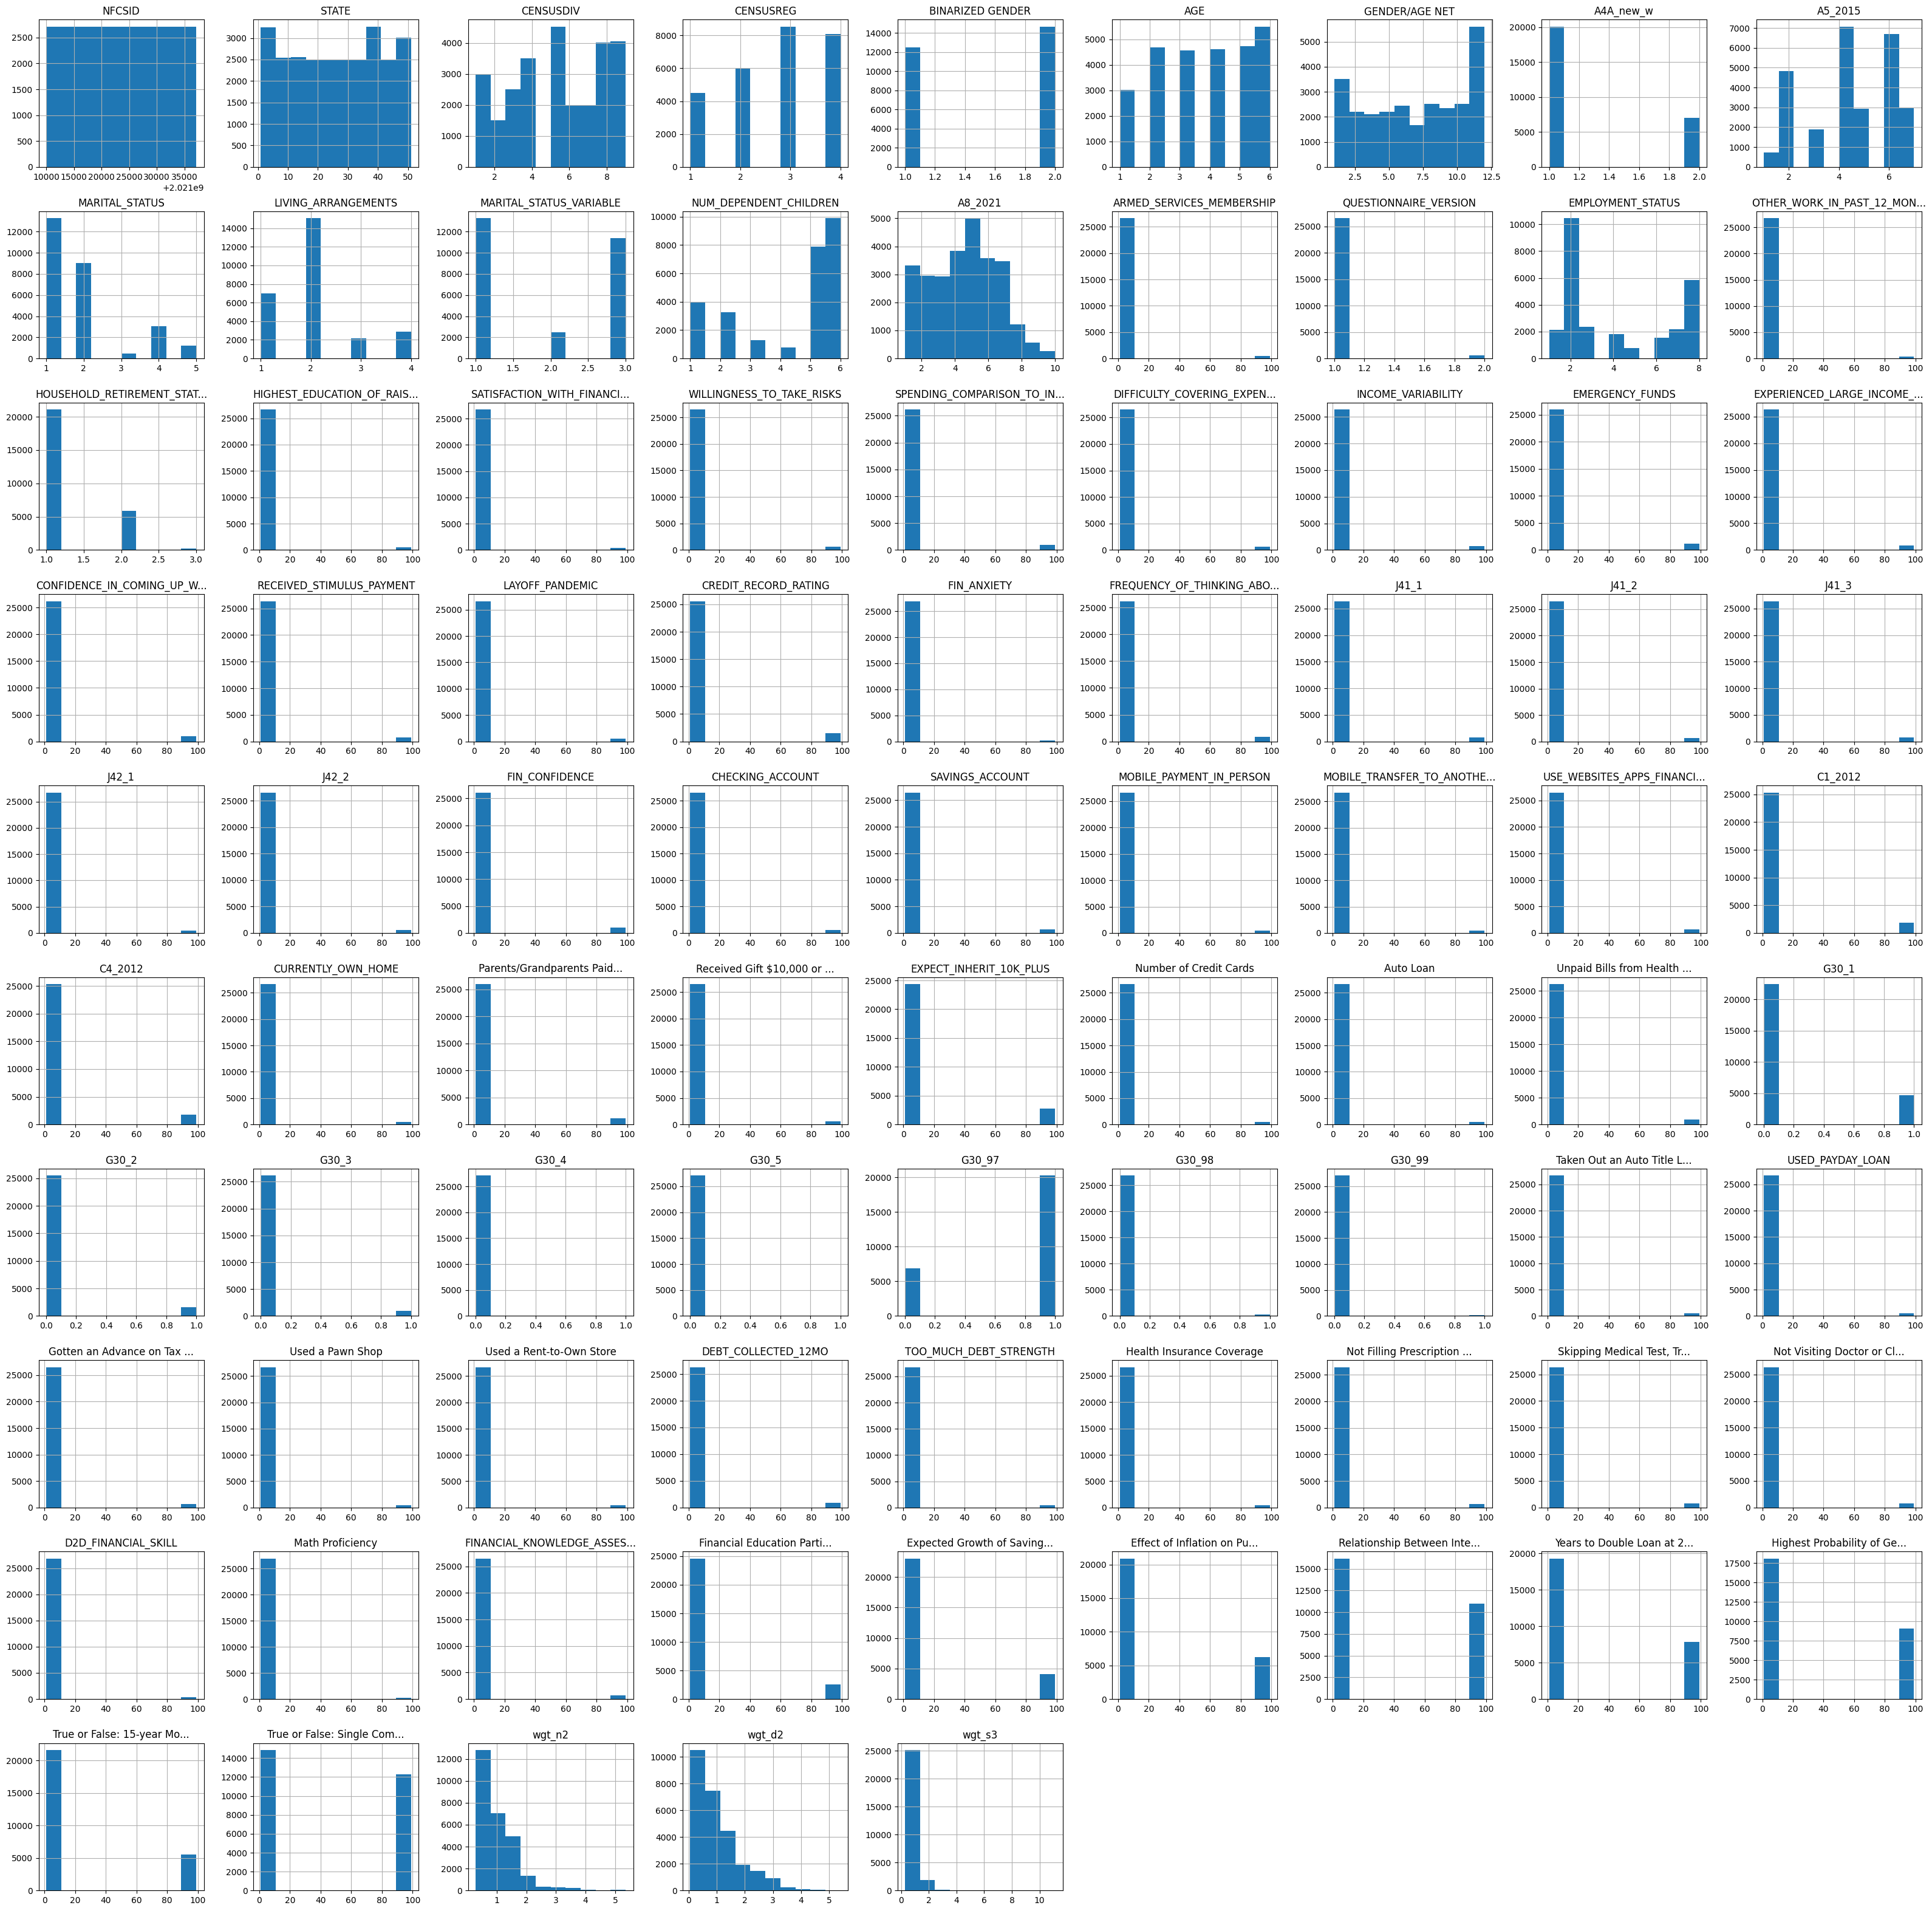

In [83]:
# Assuming df is your DataFrame with the data
plt.rcParams['figure.figsize'] = [40, 40]
axes = df.hist()

# Truncate x-axis labels to a maximum length of 30 characters
for ax in axes.flatten():
    title = ax.get_title()
    ax.set_title(str(title)[:25] + '...' if len(str(title)) > 25 else title)

plt.show()

In [84]:
df['AGE'].value_counts()

AGE
6    5501
5    4731
2    4696
4    4617
3    4564
1    3009
Name: count, dtype: int64

In [85]:
df['NUM_DEPENDENT_CHILDREN'].value_counts()

NUM_DEPENDENT_CHILDREN
6    9903
5    7887
1    3996
2    3269
3    1300
4     763
Name: count, dtype: int64

In [87]:
COVARIATES = [  ]  #dropped PART_TIME_STUDENT bc trash reporting

DUMMY_COVARIATES = [ 'RACE_ETHNICITY', 'EDUCATION_LEVEL',
                    'HIGHEST_EDUCATION_OF_RAISERS', 'NUM_DEPENDENT_CHILDREN',
                    'BINARIZED_GENDER', 'AGE', 'LAYOFF_PANDEMIC', 'FIN_ANXIETY',
                    'EXPECT_INHERIT_10K_PLUS', 'N52', 'STATE'] 

def get_employment_bin(employment_status):
    """ 
    Use to bin EMPLOYMENT_STATUS and SPOUSE_EMPLOYMENT_STATUS
    """
    if employment_status in [1,2,3]:
        return 1
    return 0 

# Note: If we want to also measure financial knowledge directly, could use 
# 'M6', 'M7', 'M8', 'M31', 'M50', '

OUTCOME_VARS = ['SATISFACTION_WITH_FINANCIAL_CONDITION', 
            'SPENDING_COMPARISON_TO_INCOME', 
            'DIFFICULTY_COVERING_EXPENSES',
            'EMERGENCY_FUNDS', 'CONFIDENCE_COMING_UP_WITH_2000', 
            'CREDIT_RECORD_RATING', 'CHECKING_ACCOUNT', 'SAVINGS_ACCOUNT',
            'OVERDRAW_CHECKING_ACCOUNT', 'REGULAR_CONTRIBUTION_TO_RETIREMENT',
            'OTHER_INVESTMENTS', 'ALWAYS_PAY_CR_FULL_12MO', 
            'LATE_WITH_STUDENT_LOAN_12MO','USED_PAYDAY_LOAN', 
            'DEBT_COLLECTED_12MO', 'TOO_MUCH_DEBT_STRENGTH',
            'D2D_FINANCIAL_SKILL', 'FINANCIAL_KNOWLEDGE_ASSESS',
            ]


def get_finhealth_score(df):
    """ 
    Given OUTCOME_VARS in df, compute single score for financial health (higher = better).
    

    Remap col values as appropriate.

    Scale col weights for roughly balanced effect of each col relative to its severity.
    """

    for i in range(len(df)):

        overall_financial_score = 0

        local_outcome_vars = []
        for varname in OUTCOME_VARS:
            local_outcome_vars.append(int(df.iloc[i][varname]))
        
        finan_condition_satis = local_outcome_vars['SATISFACTION_WITH_FINANCIAL_CONDITION']
        overall_financial_score += float(local_outcome_vars['SATISFACTION_WITH_FINANCIAL_CONDITION'] - 1)

        spend_compar_inc = local_outcome_vars['SPENDING_COMPARISON_TO_INCOME']
        if spend_compar_inc == 1:
            overall_financial_score += 9
        elif spend_compar_inc == 2:
            overall_financial_score += 4.5
        elif spend_compar_inc == 3:
            overall_financial_score += 0

        diff_cover_expens = local_outcome_vars['DIFFICULTY_COVERING_EXPENSES']
        if diff_cover_expens == 1:
            overall_financial_score += 0
        elif diff_cover_expens == 2:
            overall_financial_score += 4.5
        elif diff_cover_expens == 3:
            overall_financial_score += 9

        emerg_funds = local_outcome_vars['EMERGENCY_FUNDS']
        if emerg_funds == 1:
            overall_financial_score += 9
        elif emerg_funds == 2:
            overall_financial_score += 0

        confid_come_up_with_2000 = local_outcome_vars['CONFIDENCE_COMING_UP_WITH_2000']
        if confid_come_up_with_2000 == 1:
            overall_financial_score += 9
        elif confid_come_up_with_2000 == 2:
            overall_financial_score += 3
        elif confid_come_up_with_2000 == 3:
            overall_financial_score += 6
        elif confid_come_up_with_2000 == 4:
            overall_financial_score += 0
        
        credit_rec_rat = local_outcome_vars['CREDIT_RECORD_RATING']
        if credit_rec_rat == 1:
            overall_financial_score += 9
        elif credit_rec_rat == 2:
            overall_financial_score += 0
        
        check_acct = local_outcome_vars['CHECKING_ACCOUNT']
        if check_acct == 1:
            overall_financial_score += 9
        elif check_acct == 2:
            overall_financial_score += 0
        
        save_acct = local_outcome_vars['SAVINGS_ACCOUNT']
        if save_acct == 1:
            overall_financial_score += 9
        elif save_acct == 2:
            overall_financial_score += 0

        overdraw = local_outcome_vars['OVERDRAW_CHECKING_ACCOUNT']
        if overdraw == 1:
            overall_financial_score += 0
        elif overdraw == 2:
            overall_financial_score += 9
        
        reg_retir_contrib = local_outcome_vars['REGULAR_CONTRIBUTION_TO_RETIREMENT']
        if reg_retir_contrib == 1:
            overall_financial_score += 9
        elif reg_retir_contrib == 2:
            overall_financial_score += 0
        
        other_invests = local_outcome_vars['OTHER_INVESTMENTS']
        if other_invests == 1:
            overall_financial_score += 9
        elif other_invests == 2:
            overall_financial_score += 0
        
        always_pay_credit_card = local_outcome_vars['ALWAYS_PAY_CR_FULL_12MO']
        if always_pay_credit_card == 1:
            overall_financial_score += 9
        elif always_pay_credit_card == 2:
            overall_financial_score += 0

        payday_loan = local_outcome_vars['USED_PAYDAY_LOAN']
        if payday_loan == 1:
            overall_financial_score += 9
        elif payday_loan == 2:
            overall_financial_score += 3
        elif payday_loan == 3:
            overall_financial_score += 2
        elif payday_loan == 4:
            overall_financial_score += 1
        
        debt_collected = local_outcome_vars['DEBT_COLLECTED_12MO']
        if debt_collected == 1:
            overall_financial_score += 0
        elif debt_collected == 2:
            overall_financial_score += 9
        
        too_much_debt = local_outcome_vars['TOO_MUCH_DEBT_STRENGTH']
        if too_much_debt == 1:
            overall_financial_score += 9
        elif too_much_debt == 2:
            overall_financial_score += 7.5
        elif too_much_debt == 3:
            overall_financial_score += 6
        elif too_much_debt == 4:
            overall_financial_score += 4.5
        elif too_much_debt == 5:
            overall_financial_score += 3
        elif too_much_debt == 6:
            overall_financial_score += 1.5
        elif too_much_debt == 7:
            overall_financial_score += 0

        d2d_finan_skill = local_outcome_vars['D2D_FINANCIAL_SKILL']
        overall_financial_score += (float(d2d_finan_skill) - 1) * 1.5

        finan_knowledge = local_outcome_vars['FINANCIAL_KNOWLEDGE_ASSESS']
        overall_financial_score += (float(finan_knowledge) - 1) * 1.5
















    







TREATMENT_COLS =  ['Received Financial Education in High School']   #M20 overall can be a second option with maybe more power?